Title

Description

Importing packages.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing data into pandas DataFrame.

In [41]:
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

['fire_size_class', 'latitude', 'longitude', 'discovery_month', 'weekday', 'Vegetation', 'remoteness', 'elevation', 'Temp', 'Wind', 'Humidity', 'Precipitation']


Run the block below to get the dataset with spaciotemporal *(SPT)* data only.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend |

In [71]:
# Separate target variable (fire_size_class) from predictor variables.
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "remoteness"]]

# First we one-hot encode the target class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
# print(dfTarget.sample(5))

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)
# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)  # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness"]]), columns=["latitude", "longitude", "remoteness"])

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)

,latitude,longitude,remoteness,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
8395,0.288267,0.816184,0.151041,0,0,0,0,0,0,0,0,1,0,0,0,0,1
36892,0.229640,0.711888,0.549112,0,0,0,0,0,0,1,0,0,0,0,0,0,1
27408,0.267127,0.814832,0.153029,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15507,0.568127,0.972929,0.008872,1,0,0,0,0,0,0,0,0,0,0,0,0,1
16041,0.267401,0.670103,0.285907,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Run this block to get the dataset with the meteorological *(M)* features only.

    | Temperature | Wind speed | Humidity | Precipitation |

In [31]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["Temp", "Wind", "Humidity", "Precipitation"]]), columns=["Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one

KeyError: "['latitude', 'remoteness', 'longitude', 'elevation'] not in index"

Run this block to get the dataset with the topographic *(T)* features only.

    | Vegetation type | Elevation |

In [80]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["Vegetation", "elevation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Changing categorical variables into one-hot encoded ones.
# Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

Run this block to get the dataset with the all the features.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend | Temperature | Wind speed | Humidity | Precipitation | Vegetation type | Elevation |

In [97]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Changing categorical variables into one-hot encoded ones.
# Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# Discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)

# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True) # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one

Train-test split

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42, stratify=dfTarget)

print(X_train.shape)
print(y_train.shape, "\n")

print(X_test.shape)
print(y_test.shape)

(33522, 28)
(33522, 1) 

(3725, 28)
(3725, 1)


Before SMOTEEN

array([[<AxesSubplot:title={'center':'B'}>]], dtype=object)

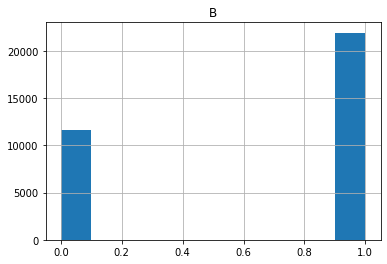

In [82]:
y_train.hist()

In order to fix the distribution of the data when training, we want to change it (in the training set only though).

First, I tried randomly undersampling the data, however that made the training set too small (down to 2.6k samples total). The results were abysmal, with basically every model getting around a 2% accuracy on the test set.

This is the code to do this, in case you want to (but you shouldn't).

In [83]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(23236, 7)
(23236, 1)


We want to convert the y_train dataset from a Pandas DataFrame to a (n, ) Numpy array.

array([[<AxesSubplot:title={'center':'B'}>]], dtype=object)

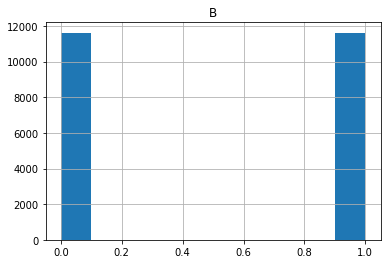

In [84]:
y_train.hist()

In [85]:
y_train = y_train.values.ravel()

Make a correlation matrix

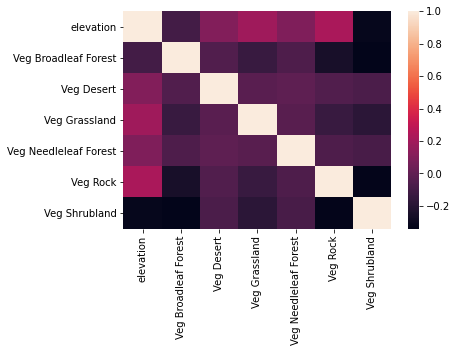

In [86]:
import seaborn as sn

corrMatrix = X_train.corr()
sn.heatmap(corrMatrix)
plt.show()

Training models, each in a cell (?)

* Dummy classifier
* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

Evaluation with confusion matrix, F1 score, etc

### Dummy classifier

In [87]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, y_train)
training_accuracy = dummy_clf.score(X_train, y_train)
test_accuracy = dummy_clf.score(X_test, y_test)
print(f"Training accuracy: {training_accuracy}")  # 0.6537796074219915
print(f"Test accuracy: {test_accuracy}")  # 0.6502013422818792


y_true, y_pred = y_test , dummy_clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Training accuracy: 0.5
Test accuracy: 0.3465771812080537
Results on the test set:
              precision    recall  f1-score   support

           0       0.35      1.00      0.51      1291
           1       0.00      0.00      0.00      2434

    accuracy                           0.35      3725
   macro avg       0.17      0.50      0.26      3725
weighted avg       0.12      0.35      0.18      3725



d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\pycharmprojects\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(2, 30, 2), 'weights': {'uniform', 'distance'}}

grid_searchKNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchKNN.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_searchKNN.score(X_test, y_test)))


y_true, y_pred = y_test , grid_searchKNN.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print(f"Best test set score: {grid_searchKNN.best_score_} with {grid_searchKNN.best_params_} parameters.")  # 0.6436993848306627 with {'n_neighbors': 25}

ValueError: Parameter grid for parameter (weights) needs to be a list or numpy array, but got (<class 'set'>). Single values need to be wrapped in a list with one element.

### Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f"GaussianNB train score: {gnb.score(X_train, y_train)}")  # 0.21296462024938845
print(f"GaussianNB test score: {gnb.score(X_test, y_test)}")  # 0.21986577181208053
print("\n")

y_true, y_pred = y_test , gnb.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

GaussianNB train score: 0.571828197624376
GaussianNB test score: 0.6703355704697986


Results on the test set:
              precision    recall  f1-score   support

           0       0.54      0.32      0.41      1291
           1       0.70      0.85      0.77      2434

    accuracy                           0.67      3725
   macro avg       0.62      0.59      0.59      3725
weighted avg       0.65      0.67      0.64      3725



### Support Vector Machine

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],'C': [0.01, 0.1, 0.25, 0.5, 1, 2]}

grid_searchSVC = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_searchSVC.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_searchSVC.score(X_test, y_test)))

y_true, y_pred = y_test , grid_searchSVC.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Test set score: 0.69
Results on the test set:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1291
           1       0.72      0.84      0.78      2434

    accuracy                           0.69      3725
   macro avg       0.65      0.62      0.62      3725
weighted avg       0.67      0.69      0.67      3725



### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 4, 16, 64, 128, 256, None], 'criterion': ['gini', 'entropy']}

grid_searchDT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchDT.fit(X_train, y_train)
DT_ResultsDf = pd.DataFrame(grid_searchDT.cv_results_)

print(DT_ResultsDf)
print(f"Best test set score: {grid_searchDT.best_score_} with {grid_searchDT.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchDT.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.033564      0.001853         0.004197        0.002398   
1        0.032367      0.006524         0.003996        0.001547   
2        0.043356      0.006081         0.003396        0.000800   
3        0.044554      0.006243         0.004595        0.001355   
4        0.043355      0.003874         0.004196        0.001937   
5        0.044355      0.003005         0.003596        0.000490   
6        0.042156      0.001598         0.004196        0.001937   
7        0.047751      0.007297         0.004595        0.001019   
8        0.017381      0.002573         0.003198        0.000399   
9        0.028570      0.003606         0.003396        0.000798   
10       0.042956      0.004512         0.003196        0.000400   
11       0.049949      0.003095         0.002997        0.000632   
12       0.048750      0.002479         0.003397        0.000799   
13       0.050748      0.004869         0.003596

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [4, 8, 16, 32, 64, 128, 256, 512], 'n_estimators': [100, 500, 1000], 'criterion': ['gini', 'entropy']}

rf_cl = RandomForestClassifier()

grid_searchRF = GridSearchCV(rf_cl, param_grid, cv=5, n_jobs=-1)
grid_searchRF.fit(X_train, y_train)
RF_ResultsDf = pd.DataFrame(grid_searchRF.cv_results_)

print(RF_ResultsDf)
print(f"Best test set score: {grid_searchRF.best_score_} with {grid_searchRF.best_params_} parameters.")


y_true, y_pred = y_test , grid_searchRF.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

KeyboardInterrupt: 

Let's make a feature importance plot.

Feature importance based on mean decrease in impurity
use this

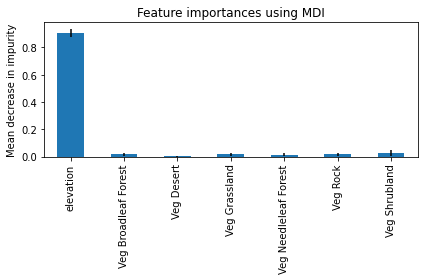

In [99]:
importances = grid_searchRF.best_estimator_.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in grid_searchRF.best_estimator_.estimators_], axis=0)

forestImportances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forestImportances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

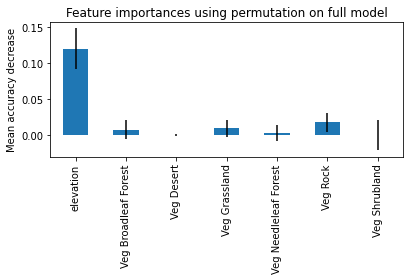

In [96]:
from sklearn.inspection import permutation_importance

importances = grid_searchRF.best_estimator_.feature_importances_
result = permutation_importance(
    grid_searchRF.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

forestImportances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forestImportances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()


### Gradient Boosted Trees (GBT)

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,4,8,16,30,40], 'loss':['deviance', 'exponential']}

grid_searchGBT = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_searchGBT.fit(X_train, y_train)
GBT_ResultsDf = pd.DataFrame(grid_searchGBT.cv_results_)

# print(GBT_ResultsDf)
print(f"Best test set score: {grid_searchGBT.best_score_} with {grid_searchGBT.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchGBT.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best test set score: 0.6279478885754213 with {'loss': 'exponential', 'max_depth': 4} parameters.
Results on the test set:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1291
           1       0.75      0.77      0.76      2434

    accuracy                           0.68      3725
   macro avg       0.65      0.64      0.64      3725
weighted avg       0.68      0.68      0.68      3725



### Multi-Layered Perceptron (MLP)

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5), (5, 5), (10), (10, 10), (10, 5), (5, 10, 5), (15, 30, 15), (5, 10, 10, 5), (15, 30, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant']
}

grid_searchMLP = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=5, n_jobs=-1)

grid_searchMLP.fit(X_train, y_train)
MLP_ResultsDf = pd.DataFrame(grid_searchMLP.cv_results_)

print(MLP_ResultsDf)
print(f"Best test set score: {grid_searchMLP.best_score_} with {grid_searchMLP.best_params_} parameters.")

y_true, y_pred = y_test , grid_searchMLP.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.525418      0.404725         0.003596    4.894343e-04   
1        2.358588      1.043364         0.003597    4.891812e-04   
2        2.717422      0.518356         0.003596    4.892396e-04   
3        2.519824      0.537045         0.004995    6.317313e-04   
4        2.026727      0.619818         0.004995    1.094365e-03   
5        2.966967      0.283117         0.004995    6.318820e-04   
6        4.646250      0.808069         0.009391    4.895316e-04   
7        5.055032      1.696438         0.006394    4.894342e-04   
8        5.555721      0.861562         0.008791    3.994227e-04   
9        2.023531      0.625683         0.003197    3.995658e-04   
10       2.742996      0.402133         0.003796    3.994704e-04   
11       2.422542      0.399919         0.003996    1.784161e-07   
12       2.394800      0.250780         0.004995    2.132481e-07   
13       2.493860      0.772679         0.003996